In [12]:
import os
os.chdir(r'E:\Repo\repo9-作业-345\整理数据-40')
import pandas as pd
import numpy as np

In [46]:
import matplotlib
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

In [13]:
jine = pd.read_excel('四省成交金额.xlsx')
bili = pd.read_excel('四省商品比例.xlsx')

In [14]:
name_columns = ['用户名','成交总金额','省份','年龄','成交时间']

In [15]:
jine[name_columns]

,用户名,成交总金额,省份,年龄,成交时间
0,小广,460.0,广东省,19,11.11
1,小董,670.0,广东省,26,11.13
2,小易,NaN,广东省,20,11.15
3,小胖,690.0,广东省,35,11.11
4,小亮,380.0,广东省,42,11.12
5,小四,1230.0,四川省,34,11.14
6,小川,650.0,四川省,41,11.14
7,小秦,580.0,四川省,27,11.13
8,小岳,870.0,四川省,22,11.11
9,小于,900.0,四川省,24,11.13


In [18]:
#1.1
data_pinjie = pd.concat([jine[name_columns],bili[name_columns]])
data_pinjie.index = np.arange(0,len(data_pinjie))

In [25]:
##1.2
data_dropna = data_pinjie.dropna()

In [26]:
##1.3
data_dropna.to_excel('第一步拼接后的数据.xlsx',index=False,encoding='utf-8_sig')

In [36]:
##2.1
data_dropna.index = np.arange(0,len(data_dropna))
zhifang1 = data_dropna.groupby('省份').sum()['成交总金额']
zhifang2 = data_dropna.groupby('省份').mean()['成交总金额']

Text(0.5, 1.0, '总金额')

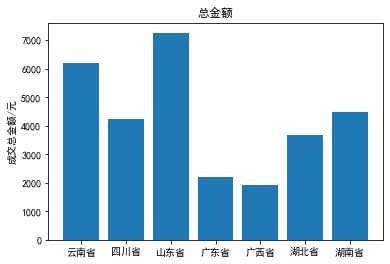

In [83]:
import matplotlib.pyplot as plt
plt.bar(zhifang1.index, zhifang1)
plt.ylabel('成交总金额/元')
plt.title('总金额')


Text(0.5, 1.0, '人均金额')

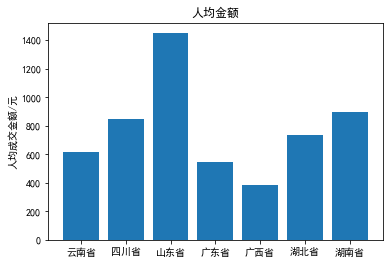

In [82]:
plt.bar(zhifang2.index,zhifang2)
plt.ylabel('人均成交金额/元')
plt.title('人均金额')

In [57]:
##2.2
data_dropna['年龄'].corr(data_dropna['成交总金额'])

-0.1234059673739997

Text(0.5, 1.0, '成交金额随时间变化')

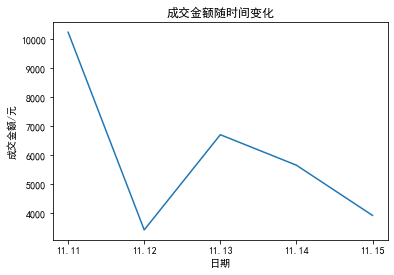

In [80]:
##2.3
data_23 = data_dropna.groupby('成交时间').sum()['成交总金额']
plt.plot(data_23)
plt.xticks(data_23.index)
plt.xlabel('日期')
plt.ylabel('成交金额/元')
plt.title('成交金额随时间变化')

In [72]:
##2.4
name_list = ['家居家电','美妆','服装','食品']
data_pie = bili[name_list]
plt.figure(figsize=(6,9)) #调节图形大小
labels = list(data_pie.sum().index) #定义标签
sizes = list(data_pie.sum()) #每块值
colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
explode = (0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.show()